**XOM Stock Price EDA**

In [42]:
# Importar librerias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/raw/XOM.csv")
df.head(10)
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
3765,2023-08-21,110.360001,110.980003,108.139999,108.709999,108.709999,11092400
3766,2023-08-22,109.169998,109.720001,107.949997,108.099998,108.099998,10520800
3767,2023-08-23,107.040001,107.300003,105.720001,107.150002,107.150002,11435600
3768,2023-08-24,106.419998,107.769997,106.070000,106.349998,106.349998,10818500
3769,2023-08-25,107.430000,108.930000,106.620003,108.250000,108.250000,13579300
3770,2023-08-28,108.449997,110.040001,108.440002,109.160004,109.160004,10382100
3771,2023-08-29,109.660004,110.019997,108.419998,109.809998,109.809998,9665000
3772,2023-08-30,110.440002,111.139999,109.980003,110.879997,110.879997,11922100
3773,2023-08-31,111.120003,111.419998,110.620003,111.190002,111.190002,17479800
3774,2023-09-01,112.199997,113.820000,112.199997,113.519997,113.519997,14828400


***Resumen Estadistico***

El resumen estadístico para las "Close" prices son los siguientes:

Count: 3775 observaciones  
Mean: $79.08  
Standard Deviation: $15.80, indicando el nivel de volatilidad  
Minimum: $31.45  
25th Percentile: $70.00  
Median (50th Percentile): $81.26   
75th Percentile: $88.23  
Maximum: $119.16

In [43]:
# Estadisticas de 'Close' prices
summary_stats = df['Close'].describe()
summary_stats

count    3775.000000
mean       79.084752
std        15.804411
min        31.450001
25%        70.000000
50%        81.260002
75%        88.235000
max       119.169998
Name: Close, dtype: float64

***TENDENCIAS***

El gráfico muestra los close prices de las acciones a lo largo del tiempo. 

Observaciones clave:

Hay una importante tendencia al alza, especialmente en los últimos años.
El precio de las acciones ha experimentado períodos de volatilidad, evidente por las fluctuaciones.



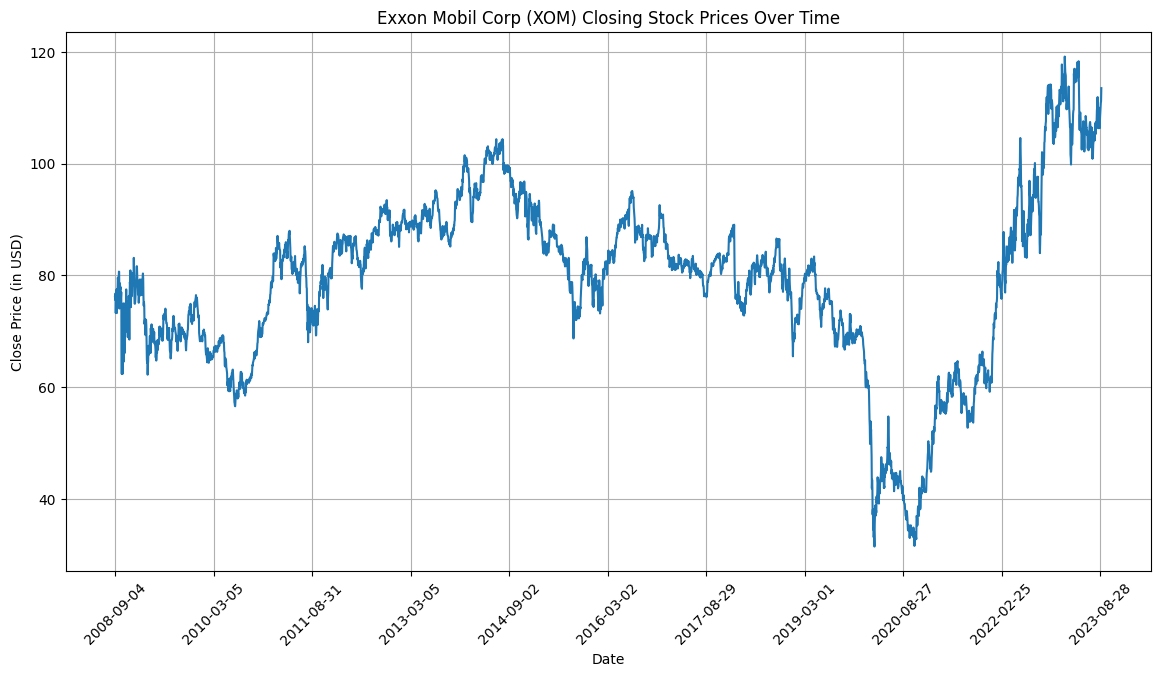

In [44]:
# Graficando los 'Close' prices para visualizar tendencias
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'])
plt.title('Exxon Mobil Corp (XOM) Closing Stock Prices Over Time')
plt.xlabel('Date')
plt.xticks(df['Date'][::len(df)//10], rotation=45)
plt.ylabel('Close Price (in USD)')
plt.grid(True)
plt.show()


A continuación, examinemos si existe alguna estacionalidad o patrones recurrentes en los precios de las acciones. Para ello, miraremos los precios de cierre mensuales promedio.

***ESTACIONALIDAD***

El gráfico muestra los precios promedio mensuales de cierre de las acciones.

Observaciones clave:

Si bien no existe un patrón estacional claro, la acción parece tener períodos de rápido crecimiento seguidos de estabilización.
La tendencia es generalmente ascendente, alineándose con la tendencia a largo plazo observada en los datos diarios.

A continuación, examinemos la volatilidad del precio de las acciones. Para ello, calcularé la desviación estándar móvil de los precios de "Cierre".

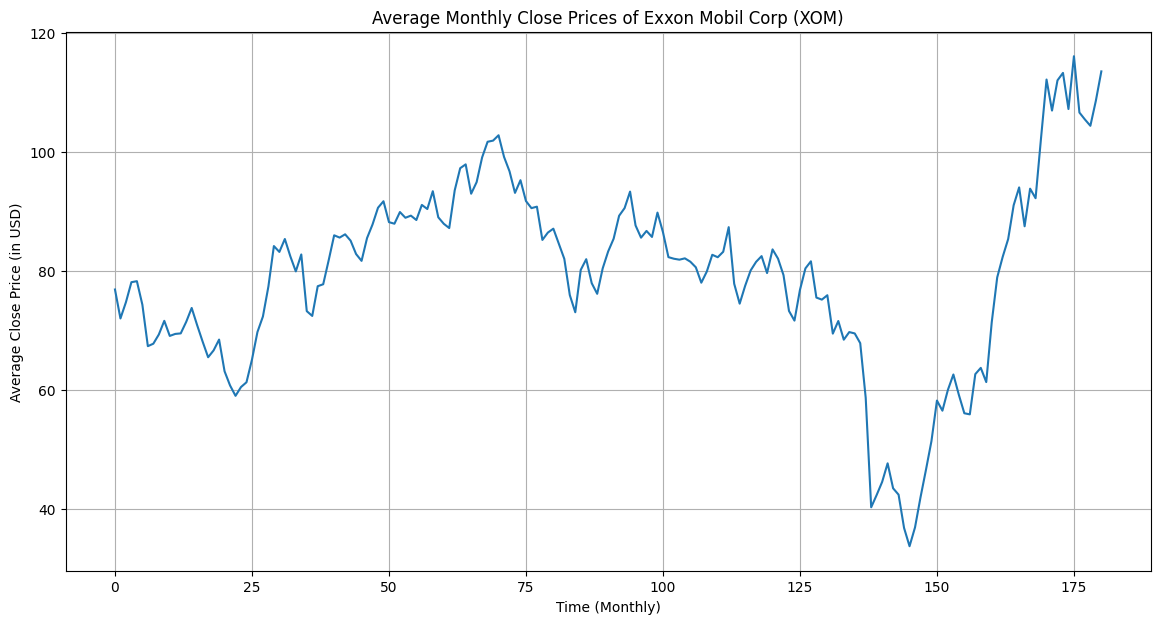

In [45]:
# Convertir 'Date' a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extraer el mes y año de la columna 'Date'
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Calcular precios de cierre mensual promedio
average_monthly_close = df.groupby(['Year', 'Month'])['Close'].mean().reset_index()

# Graficar el precio de cierre mensual promedio
plt.figure(figsize=(14, 7))
plt.plot(range(len(average_monthly_close)), average_monthly_close['Close'])
plt.title('Average Monthly Close Prices of Exxon Mobil Corp (XOM)')
plt.xlabel('Time (Monthly)')
plt.ylabel('Average Close Price (in USD)')
plt.grid(True)
plt.show()

***VOLATILIDAD***

El gráfico muestra la desviación estándar móvil de 30 días de los precios de cierre de las acciones, que sirve como medida de la volatilidad. Observaciones clave:

La volatilidad parece tener algunos picos, que a menudo corresponden a eventos importantes, que podrían ser  del mercado o anuncios de empresas.
La volatilidad parece ser relativamente menor en tiempos más recientes, lo que sugiere un precio de las acciones más estable.
A continuación, exploremos la correlación entre el precio de las acciones ("Close") y el volumen de operaciones ("Volume").

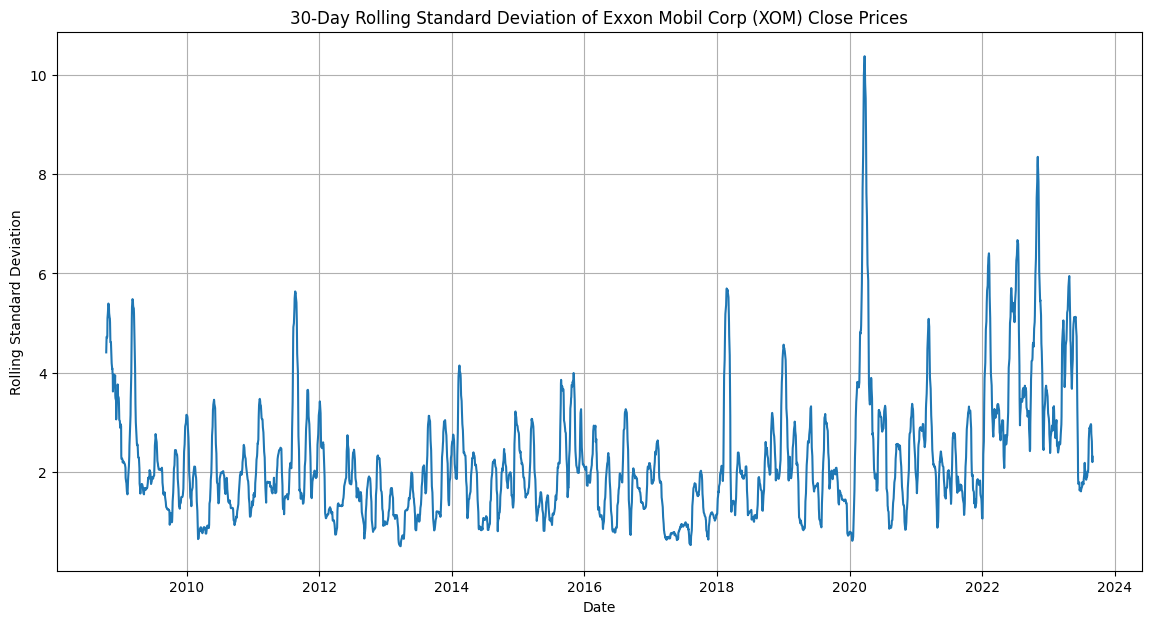

In [46]:
# Calcular la desviación estándar deslizante de precios 'Close' (ventana de 30-dias)
df['Rolling_Std'] = df['Close'].rolling(window=30).std()

# Graficando la desviacion estandar deslizante para visualizar la volatilidad
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Rolling_Std'])
plt.title('30-Day Rolling Standard Deviation of Exxon Mobil Corp (XOM) Close Prices')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.grid(True)
plt.show()

***CORRELACION***

El coeficiente de correlación entre los precios de "Close" y el "Volume" es aproximadamente
−0.42 . Esta correlación negativa sugiere que:

Los mayores volúmenes de negociación a menudo corresponden a precios de acciones más bajos, y viceversa.
Sin embargo, la correlación es moderada, por lo que no se trata de una relación fuerte.

In [47]:
# Calcular la correlacion entre 'Close' y 'Volume'
correlation = df['Close'].corr(df['Volume'])
correlation

-0.42892371380351424

***FORECASTING***

Nos interesa predecir los precios de las acciones de los proximos 30 días usando los siguientes modelos de Machine Learning:

* Random Forest Regressor
* Support Vector Machine
* Linear Regression

In [48]:
# Importar librerias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


Normalización de datos: para que el modelo sea más fácil de entrenar, normalizaremos los precios de "Close".

Ventana deslizante: crearemos una ventana deslizante de precios de acciones pasados para utilizarla como funciones para predecir el precio de acciones futuro.

In [49]:
# Normalizar los datos
# Reshape los datos de 'Close' para hacer fit con el Scaler
close_prices = df['Close'].values.reshape(-1, 1)

# Iniciar el MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalizar los precios de 'Close'
scaled_close = scaler.fit_transform(close_prices)

# Mostrar las primeras filas de los datos scaled
scaled_close[:5]

array([[0.50946192],
       [0.50353401],
       [0.51664384],
       [0.47663021],
       [0.49931601]])

Los precios de "Close" se han normalizado en un rango entre 0 y 1, lo que facilita que el modelo de machine learning procese los datos.

A continuación, creemos un conjunto de datos con una ventana deslizante de los precios de las acciones anteriores. Esto servirá como nuestras características (X) para predecir el precio futuro de las acciones (y).

In [50]:
# Definir el tamaño de la ventana e inicializar listas vacías para features y labels
window_size = 90
X = []
y = []

# Crear features y labels
for i in range(window_size, len(scaled_close)):
    X.append(scaled_close[i - window_size:i, 0])
    y.append(scaled_close[i, 0])

# Convertir listas a numpy arrays
X, y = np.array(X), np.array(y)

# Reshape las features a un formato apto para los modelos que usaremos: Linear Regression, RandomForest  ([samples, features])
X = np.reshape(X, (X.shape[0], X.shape[1]))

# Mostrar el shape de X and y
X.shape, y.shape

((3685, 90), (3685,))

Dividimos los datos en sets de train y test. Luego, procedemos a seleccionar y entrenar un modelo de machine learning.

In [51]:
# Dividir los datos en sets de train y test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Mostrar el shape de los sets de train y test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2948, 90), (737, 90), (2948,), (737,))

***RANDOM FOREST***


In [52]:
from sklearn.ensemble import RandomForestRegressor

# Iniciar y fit el Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Evaluar el modelo en el set de test
rf_score = random_forest.score(X_test, y_test)
rf_score

0.9640041677438738

La puntuación del modelo en el conjunto de prueba es aproximadamente 0.96, lo que sugiere que el modelo Random Forest está funcionando bien en este conjunto de datos. 

In [53]:
# Preparar los últimos 90 días de los datos existentes para predecir el día siguiente y luego actualice para cada día posterior
last_90_daysrf = scaled_close[-window_size:]

# Iniciar una lista vacía para guardar las predicciones
predictions_30_daysrf = []

# For Loop para predecir los proximos 30 dias
for i in range(30):
    last_90_daysrf_reshaped = last_90_daysrf.reshape(1, -1)
    next_day_predrf = random_forest.predict(last_90_daysrf_reshaped)
    
    # Append la predicción a la lista
    predictions_30_daysrf.append(next_day_predrf[0])
    
    # Actualizar last_90_days para la siguiente iteración
    last_90_daysrf = np.append(last_90_daysrf[1:], next_day_predrf)

# Reverse-scale las predicciones a la escala original
predictions_30_days_unscaledrf = scaler.inverse_transform(np.array(predictions_30_daysrf).reshape(-1, 1))

# Mostrar las predicciones de los proximos 30 dias
predictions_30_days_unscaledrf

array([[102.08160121],
       [101.9535011 ],
       [101.96320112],
       [101.96190115],
       [101.95990103],
       [102.0402011 ],
       [102.34210108],
       [102.2097013 ],
       [102.27800127],
       [102.33990122],
       [102.27820113],
       [102.34060115],
       [102.26350112],
       [102.29910106],
       [102.28310115],
       [102.28980113],
       [102.29150111],
       [102.04000113],
       [102.06150099],
       [102.07800108],
       [102.07350111],
       [102.31620113],
       [102.28130112],
       [102.29520122],
       [102.39150112],
       [102.48970103],
       [102.50420093],
       [102.41580095],
       [102.46890093],
       [102.51840083]])

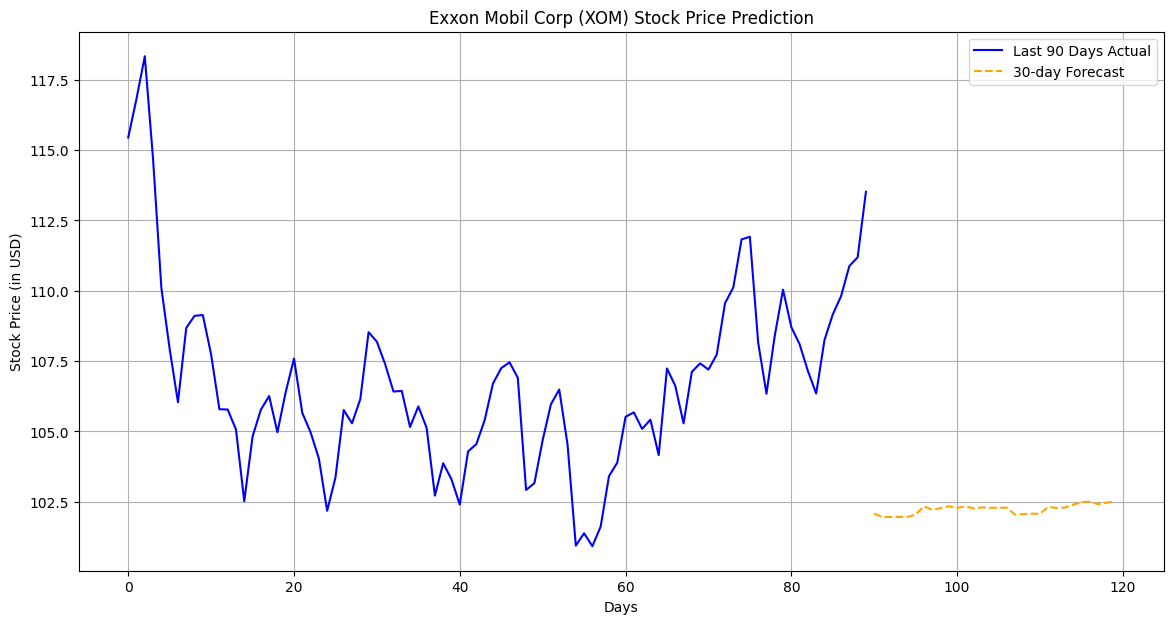

In [54]:
# Extraer los ultimos 90 dias de precios reales
last_90_days_actual = close_prices[-window_size:]

# Preparar los x-axis labels
days_actual = np.arange(len(last_90_days_actual))
days_forecast = np.arange(len(last_90_days_actual), len(last_90_days_actual) + 30)

# Graficar los precios actuales y predecidos
plt.figure(figsize=(14, 7))
plt.plot(days_actual, last_90_days_actual, label="Last 90 Days Actual", color='blue')
plt.plot(days_forecast, predictions_30_days_unscaledrf, label="30-day Forecast", color='orange' , linestyle='dashed')
plt.title('Exxon Mobil Corp (XOM) Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price (in USD)')
plt.legend()
plt.grid(True)
plt.show()

***Support Vector Machine***

In [55]:
from sklearn.svm import SVR

# Iniciar y fit el Support Vector Regressor
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(X_train, y_train)  # Reusamos el training data

# Evaluar el modelo en el set de test
svr_score = svr.score(X_test, y_test)
svr_score

0.8420853793854091

La puntuación del modelo en el conjunto de prueba es aproximadamente 0.84, lo que sugiere que el modelo Support Vector Regression no está funcionando bien en este conjunto de datos. 

Es posible que SVR no sea adecuado para tareas de predicción de series temporales univariadas como esta.

***LINEAR REGRESSION***

In [56]:
from sklearn.linear_model import LinearRegression

# Iniciar y fit el Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train) 

# Evaluar el modelo en el set de test
linear_reg_score = linear_reg.score(X_test, y_test)
linear_reg_score

0.9954882026410555

La puntuación del modelo en el conjunto de prueba es aproximadamente 0.995, lo que sugiere que el modelo Linear Regression está funcionando bastante bien en este conjunto de datos. Una puntuación cercana a 1 indica que el modelo explica una gran parte de la varianza en la variable objetivo.

***Prediciendo Precios Usando el Linear Regression Model***

In [57]:
# Preparar los últimos 90 días de los datos existentes para predecir el día siguiente y luego actualice para cada día posterior
last_90_days = scaled_close[-window_size:]

# Iniciar una lista vacía para guardar las predicciones
predictions_30_days = []

# For Loop para predecir los proximos 30 dias
for i in range(30):
    last_90_days_reshaped = last_90_days.reshape(1, -1)
    next_day_pred = linear_reg.predict(last_90_days_reshaped)
    
    # Append la predicción a la lista
    predictions_30_days.append(next_day_pred[0])
    
    # Actualizar last_90_days para la siguiente iteración
    last_90_days = np.append(last_90_days[1:], next_day_pred)

# Reverse-scale las predicciones a la escala original
predictions_30_days_unscaled = scaler.inverse_transform(np.array(predictions_30_days).reshape(-1, 1))

# Mostrar las predicciones de los proximos 30 dias
predictions_30_days_unscaled


array([[113.17224152],
       [113.5637356 ],
       [113.44944553],
       [113.22097956],
       [113.13733121],
       [113.11843564],
       [113.32557723],
       [113.14544485],
       [113.26014576],
       [113.65001263],
       [113.86065513],
       [113.78430561],
       [113.71157934],
       [113.84916205],
       [113.51499099],
       [113.44004067],
       [113.46636225],
       [113.4396359 ],
       [113.75289767],
       [113.71005014],
       [113.37830018],
       [112.97957253],
       [113.26710405],
       [113.43198919],
       [113.11478725],
       [112.77060402],
       [112.19796853],
       [112.56884156],
       [112.89593865],
       [112.86961824]])

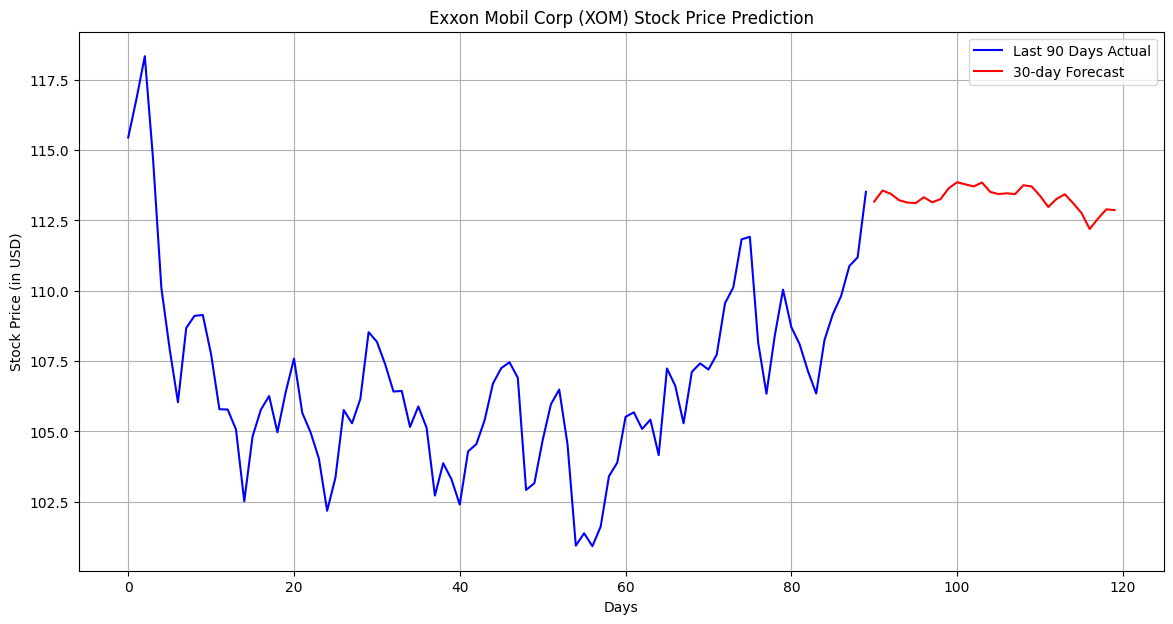

In [58]:
# Extraer los ultimos 90 dias de precios reales
last_90_days_actual = close_prices[-window_size:]

# Preparar los x-axis labels
days_actual = np.arange(len(last_90_days_actual))
days_forecast = np.arange(len(last_90_days_actual), len(last_90_days_actual) + 30)

# Graficar los precios actuales y predecidos
plt.figure(figsize=(14, 7))
plt.plot(days_actual, last_90_days_actual, label="Last 90 Days Actual", color='blue')
plt.plot(days_forecast, predictions_30_days_unscaled, label="30-day Forecast", color='red')
plt.title('Exxon Mobil Corp (XOM) Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price (in USD)')
plt.legend()
plt.grid(True)
plt.show()

El modelo Linear Regression predijo un ligero declive en el precio de las acciones durante los próximos 30 días. 

***MonteCarlo Simulation***

La simulación Monte Carlo es una técnica que permite tener en cuenta el riesgo en el análisis cuantitativo y la toma de decisiones. Proporciona una variedad de resultados posibles basados en la variabilidad de las variables de entrada, lo que es particularmente útil para estimar los posibles precios futuros de las acciones.

Para esta simulación, hacemos algunas suposiciones:

Los rendimientos de las acciones se distribuyen normalmente. Esto es una simplificación, ya que los rendimientos de las acciones en el mundo real a menudo tienen colas gruesas y no son perfectamente normales.
Utilizaré la media histórica y la desviación estándar de los rendimientos diarios de la acción para modelar su comportamiento futuro.

Así es como procederemos:

* Calcular los rendimientos diarios: calcular los rendimientos diarios a partir de los precios históricos de "Close".
* Ejecutar simulación: utilizar la media y la desviación estándar de los rendimientos para simular el precio de las acciones durante los próximos 30 días, ejecutando múltiples escenarios.
* Analizar resultados: Proporcionar estadísticas sobre los precios futuros de las acciones simulados.

In [59]:
# Calcular los rendimientos diarios
df['Daily_Return'] = df['Close'].pct_change().dropna()

# Calculate la media y desviación estándar de los rendimientos diarios
mean_daily_return = df['Daily_Return'].mean()
std_daily_return = df['Daily_Return'].std()

mean_daily_return, std_daily_return

(0.0002608811627448553, 0.017626793381620657)

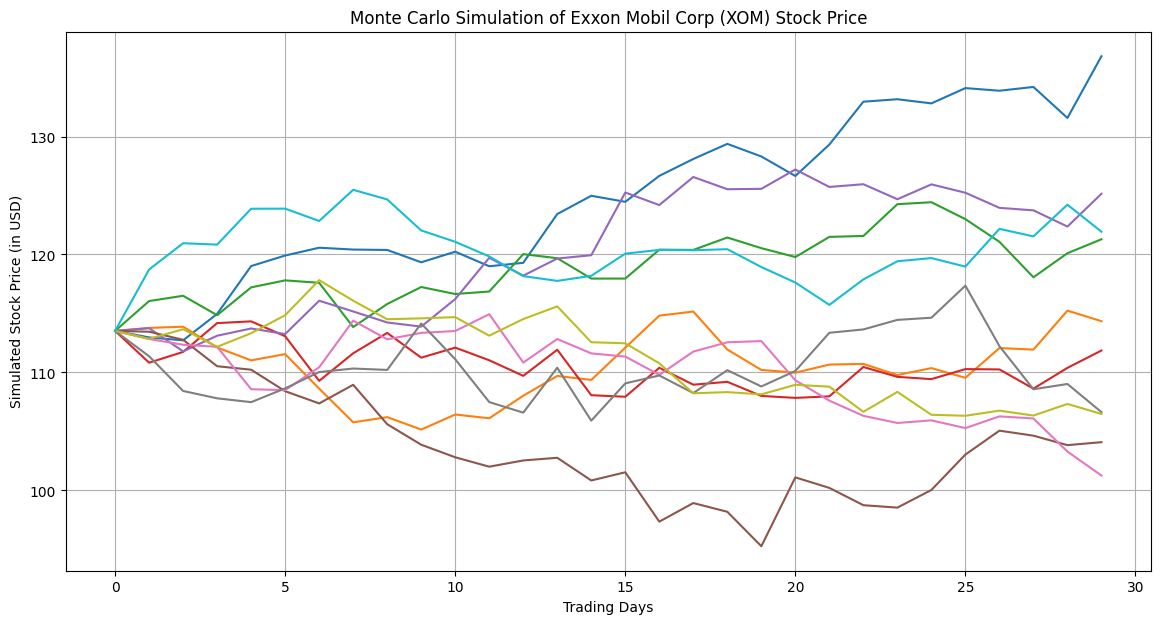

count    1000.000000
mean      114.455274
std        10.540168
min        86.168436
25%       107.199858
50%       113.835321
75%       121.000971
max       153.939511
Name: 29, dtype: float64

In [60]:
# Numero de dias y escenarios
num_days = 30
num_scenarios = 1000

# Iniciar una matriz para almacenar los precios de las acciones simuladas
simulated_prices = np.zeros((num_days, num_scenarios))

# Settear la primera fila de precios simulados en el ultimo precio de cierre de los datos históricos
last_close_price = df['Close'].iloc[-1]
simulated_prices[0, :] = last_close_price

# Simular precios de acciones
np.random.seed(51)  # seed para reproducibilidad
for day in range(1, num_days):
    random_returns = np.random.normal(loc=mean_daily_return, scale=std_daily_return, size=num_scenarios)
    simulated_prices[day] = simulated_prices[day - 1] * (1 + random_returns)

# Convertir a DataFrame para un manejo más fácil
simulated_df = pd.DataFrame(simulated_prices)

# Graficar algunas trayectorias
plt.figure(figsize=(14, 7))
plt.plot(simulated_df.iloc[:, :10])
plt.title('Monte Carlo Simulation of Exxon Mobil Corp (XOM) Stock Price')
plt.xlabel('Trading Days')
plt.ylabel('Simulated Stock Price (in USD)')
plt.grid(True)
plt.show()

# Estadisticas
simulated_stats = simulated_df.iloc[-1].describe()
simulated_stats


***Resultados de Monte Carlo Simulation***

El gráfico anterior muestra 10 ejemplos de trayectorias simuladas para el precio de las acciones durante los próximos 30 días. Cada línea representa un posible escenario basado en la media histórica y la desviación estándar de los rendimientos diarios de la acción.

Estadísticas resumidas de precios de acciones simuladas el día 30
Count: 1000 escenarios
Mean: $114.45 (precio promedio de las acciones simuladas)
Standard Deviation: $10.54 (volatilidad en el precio de las acciones simuladas)
Minimum: $86.16 (precio de acción simulado más bajo)
25th Percentile: $107.19
Median (50th Percentile): $113.83
75th Percentile: $121.00
Maximum: $153.93 (precio de acción simulado más alto)

Estas estadísticas nos dan una idea del rango de posibles resultados para el precio de las acciones. Por ejemplo, en el 50% de los escenarios simulados, el precio de las acciones después de 30 días se sitúa aproximadamente entre $107.19 y $121.00 dólares.

***Resultados***

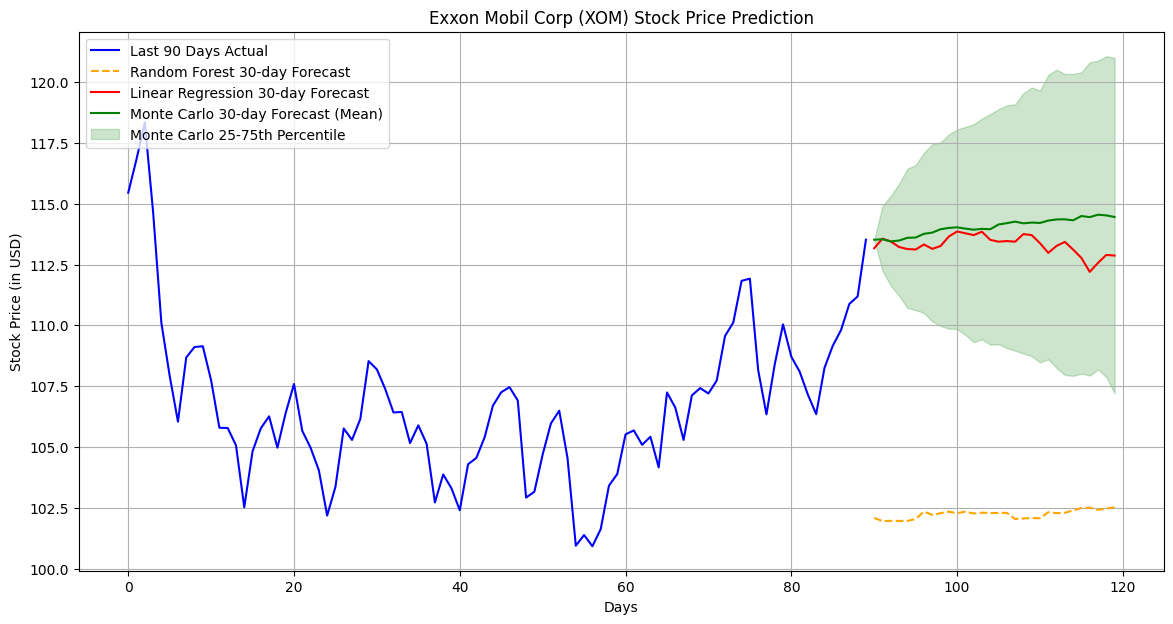

In [62]:
# Preparar los x-axis labels para mostrar Linear Regression y Monte Carlo simulation
days_linear_forecast = np.arange(len(last_90_days_actual), len(last_90_days_actual) + 30)
days_monte_carlo = np.arange(len(last_90_days_actual), len(last_90_days_actual) + num_days)

# Graficar los precios actuales, predicción Linear Regression, y Monte Carlo simulation
plt.figure(figsize=(14, 7))
plt.plot(days_actual, last_90_days_actual, label="Last 90 Days Actual", color='blue')
plt.plot(days_forecast, predictions_30_days_unscaledrf, label="Random Forest 30-day Forecast", color='orange' , linestyle='dashed')
plt.plot(days_linear_forecast, predictions_30_days_unscaled, label="Linear Regression 30-day Forecast", color='red')
plt.plot(days_monte_carlo, simulated_df.mean(axis=1), label="Monte Carlo 30-day Forecast (Mean)", color='green')
plt.fill_between(days_monte_carlo, simulated_df.quantile(0.25, axis=1), simulated_df.quantile(0.75, axis=1), color='green', alpha=0.2, label="Monte Carlo 25-75th Percentile")
plt.title('Exxon Mobil Corp (XOM) Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price (in USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

El gráfico muestra los precios reales de las acciones de los últimos 90 días en azul, el pronóstico de 30 días del modelo Linear Regression en rojo y el pronóstico medio de la simulación de Monte Carlo en verde. El área sombreada representa el rango del percentil 25 al 75 de la simulación de Monte Carlo, lo que proporciona una idea de la incertidumbre en torno al pronóstico.

***Conclusiones clave:***

El modelo de regresión lineal predice un ligero declive en el precio de las acciones durante los próximos 30 días.
La simulación de Monte Carlo proporciona una gama más amplia de resultados posibles, capturando la volatilidad e incertidumbre inherentes a los precios de las acciones.

***DISCLAIMER***

Si bien el pronóstico de los modelos pueden parecer razonables, es esencial recordar que los precios de las acciones están influenciados por muchos factores, incluidas las condiciones del mercado, los indicadores económicos y el desempeño de las empresas. Por lo que este proyecto es teórico, de principiantes y no para uso financiero.

***FIN***